<a href="https://colab.research.google.com/github/Fekry2016/data-analysis-with-python/blob/main/Training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Segment 1 * 

Filtering & Selecting Data

add Codeadd Markdown
Selecting and retrieving data

you can write and index value in two ways

In [1]:
!pip install pandas
!pip install numpy

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy import stats
from scipy.stats.stats import pearsonr,spearmanr
from scipy.stats import chi2_contingency

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline  
#for data visualization online in jupyter notebook.
rcParams['figure.figsize'] =14,7  #To set dimensions of the vizualization plot (14 for width & 7 for hight)
plt.style.use('seaborn-whitegrid') #To set the plot style.

In [3]:
np.random.seed(25)
DF_obj= pd.DataFrame(np.random.rand(36).reshape((6,6)),
index=['Row 1','Row 2','Row 3','Row 4','Row 5','Row 6'],
columns= ['Column 1','Column 2','Column 3','Column 4','Column 5','Column 6'])
print(DF_obj)

       Column 1  Column 2  Column 3  Column 4  Column 5  Column 6
Row 1  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
Row 2  0.684969  0.437611  0.556229  0.367080  0.402366  0.113041
Row 3  0.447031  0.585445  0.161985  0.520719  0.326051  0.699186
Row 4  0.366395  0.836375  0.481343  0.516502  0.383048  0.997541
Row 5  0.514244  0.559053  0.034450  0.719930  0.421004  0.436935
Row 6  0.281701  0.900274  0.669612  0.456069  0.289804  0.525819


In [4]:
DF_obj.loc[['Row 1', 'Row 6'], ['Column 1', 'Column 3']]

,Column 1,Column 3
Row 1,0.870124,0.278839
Row 6,0.281701,0.669612


Slicing
Slicing is the operation which allows you to extract portions of an array to generate new ones. Whereas 
using the Python lists the arrays obtained by slicing are copies, in NumPy, arrays are views onto the same 
underlying buffer.
Depending on the portion of the array that you want to extract (or view) you must make use of the slice 
syntax; that is, you will use a sequence of numbers separated by colons (‘:’) within the square brackets.

In [5]:
DF_obj['Row 1':'Row 5']

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935


# comparing with scalers
Scalers are just single numerical values,you can use comparison operators like '>' or '<' to return True/False values for all records to indicate how each element compares to the scaler value.

In [ ]:
DF_obj <.2

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,False,False,False,True,False,True
Row 2,False,False,False,False,False,True
Row 3,False,False,True,False,False,False
Row 4,False,False,False,False,False,False
Row 5,False,False,True,False,False,False
Row 6,False,False,False,False,False,False


In [ ]:
series_obj= Series(np.arange(8), index=['Row 1','Row 2','Row 3','Row 4','Row 5','Row 6','Row 7','Row 8'])
series_obj

Row 1    0
Row 2    1
Row 3    2
Row 4    3
Row 5    4
Row 6    5
Row 7    6
Row 8    7
dtype: int64

# Filtering with scalers

In [ ]:
series_obj[series_obj >5]

Row 7    6
Row 8    7
dtype: int64

# Setting Values With scalers

In [ ]:
series_obj['Row 1','Row 3','Row 5']=8
series_obj

Row 1    8
Row 2    1
Row 3    8
Row 4    3
Row 5    8
Row 6    5
Row 7    6
Row 8    7
dtype: int64

# Chapter 2 - Data preparation Basics

# Segment2 : Dealing with missing values

# Figuring out what data is missing

In [ ]:
missing = np.nan
series_obj= Series(['Row 1','Row 2',missing,'Row 4','Row 5','Row 6',missing,'Row 8'])
series_obj

0    Row 1
1    Row 2
2      NaN
3    Row 4
4    Row 5
5    Row 6
6      NaN
7    Row 8
dtype: object

In [ ]:
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

# Filtering with Missing Values

In [ ]:
DF_obj.iloc[1:3, 0]= missing
DF_obj.iloc[3:6, 5]= missing
DF_obj

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,NaN,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,NaN,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,NaN
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,NaN
Row 6,0.281701,0.900274,0.669612,0.456069,0.289804,NaN


# Filling missed values with 0

In [ ]:
filled_DF = DF_obj.fillna(0)
filled_DF

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,0.000000,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,0.000000,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.000000
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.000000
Row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.000000


In [ ]:
filled_DF = DF_obj.fillna({0: .1, 5:1.25})
filled_DF

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,NaN,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,NaN,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,NaN
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,NaN
Row 6,0.281701,0.900274,0.669612,0.456069,0.289804,NaN


In [ ]:
filled_DF = DF_obj.fillna(method= 'ffill')
filled_DF

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
Row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
Row 2,0.870124,0.437611,0.556229,0.367080,0.402366,0.113041
Row 3,0.870124,0.585445,0.161985,0.520719,0.326051,0.699186
Row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.699186
Row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.699186
Row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.699186


# Counting missing values

In [ ]:
np.random.seed(25)
DF_obj= pd.DataFrame(np.random.rand(36).reshape((6,6)))
DF_obj.iloc[1:3, 0]= missing
DF_obj.iloc[3:6, 5]= missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,NaN,0.437611,0.556229,0.367080,0.402366,0.113041
2,NaN,0.585445,0.161985,0.520719,0.326051,0.699186
3,0.366395,0.836375,0.481343,0.516502,0.383048,NaN
4,0.514244,0.559053,0.034450,0.719930,0.421004,NaN
5,0.281701,0.900274,0.669612,0.456069,0.289804,NaN


In [ ]:
DF_obj.isnull().sum()

0    2
1    0
2    0
3    0
4    0
5    3
dtype: int64

# Filtering out missing values

In [ ]:
DF_no_NAN = DF_obj.dropna()
DF_no_NAN

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [ ]:
DF_no_NAN = DF_obj.dropna(axis=1)
DF_no_NAN

,1,2,3,4
0,0.582277,0.278839,0.185911,0.411100
1,0.437611,0.556229,0.367080,0.402366
2,0.585445,0.161985,0.520719,0.326051
3,0.836375,0.481343,0.516502,0.383048
4,0.559053,0.034450,0.719930,0.421004
5,0.900274,0.669612,0.456069,0.289804


# Removing Duplicates

In [ ]:
df_obj=DataFrame({'column 1':[1,1,2,2,3,3,3],
                 'column 2': ['a','a','b','b','c','c','c'],
                 'column 3': ['A','A','B','B','C','C','C']})
df_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [ ]:
df_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [ ]:
df_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [ ]:
df_obj=DataFrame({'column 1':[1,1,2,2,3,3,3],
                 'column 2': ['a','a','b','b','c','c','c'],
                 'column 3': ['A','A','B','B','C','D','C']})
df_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [ ]:
df_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


# Segment 4 : Concatenation & Transformation 

In [ ]:
DF_obj= pd.DataFrame(np.random.rand(36).reshape((6,6)))
DF_obj

,0,1,2,3,4,5
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257


In [ ]:
DF_obj2= pd.DataFrame(np.random.rand(15).reshape((5,3)))
DF_obj2

,0,1,2
0,0.590885,0.163652,0.836928
1,0.775203,0.169041,0.766994
2,0.335366,0.472398,0.215064
3,0.912094,0.759208,0.676561
4,0.021376,0.660874,0.094440


# Concatenating data

In [ ]:
pd.concat([DF_obj, DF_obj2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0.590885,0.163652,0.836928
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,0.775203,0.169041,0.766994
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,0.335366,0.472398,0.215064
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,0.912094,0.759208,0.676561
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821,0.021376,0.660874,0.094440
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257,NaN,NaN,NaN


In [ ]:
pd.concat([DF_obj, DF_obj2])

,0,1,2,3,4,5
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257
0,0.590885,0.163652,0.836928,NaN,NaN,NaN
1,0.775203,0.169041,0.766994,NaN,NaN,NaN
2,0.335366,0.472398,0.215064,NaN,NaN,NaN
3,0.912094,0.759208,0.676561,NaN,NaN,NaN


# Transforming data

# Dropping Data

In [ ]:
DF_obj.drop([0, 3], axis=1)

,1,2,4,5
0,0.745284,0.828346,0.077140,0.644862
1,0.524254,0.958092,0.295432,0.512376
2,0.641717,0.132421,0.076742,0.331044
3,0.509213,0.655146,0.719055,0.415219
4,0.825139,0.712552,0.842154,0.440821
5,0.913676,0.547778,0.027474,0.206257


In [ ]:
DF_obj.drop([0, 3])

,0,1,2,3,4,5
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257


# Adding Data

In [ ]:
series_obj = Series(np.arange(6))
series_obj.name='added variable'
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added variable, dtype: int64

# A- Adding data using join method

In [ ]:
variable_added = DataFrame.join(DF_obj, series_obj)
variable_added

,0,1,2,3,4,5,added variable
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821,4
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257,5


# B- Adding data using append method

In [ ]:
added_table = variable_added.append(variable_added, ignore_index=False)
added_table

,0,1,2,3,4,5,added variable
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821,4
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257,5
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3


In [ ]:
added_table = variable_added.append(variable_added, ignore_index=True)
added_table

,0,1,2,3,4,5,added variable
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821,4
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257,5
6,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862,0
7,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376,1
8,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044,2
9,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219,3


# Sorting Data

In [ ]:
DF_Sorted =DF_obj.sort_values(by=(5), ascending=[False])
DF_Sorted

,0,1,2,3,4,5
0,0.559242,0.745284,0.828346,0.823694,0.077140,0.644862
1,0.309258,0.524254,0.958092,0.883201,0.295432,0.512376
4,0.396542,0.825139,0.712552,0.097937,0.842154,0.440821
3,0.679852,0.509213,0.655146,0.602120,0.719055,0.415219
2,0.088702,0.641717,0.132421,0.766486,0.076742,0.331044
5,0.373989,0.913676,0.547778,0.251937,0.027474,0.206257


# Grouping Data

In [ ]:
body='https://docs.google.com/spreadsheets/d/e/2PACX-1vQe3EtNQuFOzBQovF39wjmc4Mbn858g16IGoFQ1_8Iw-i9csJ6HA83c3fi6BIVHVZ3bVniDLTMhNSa6/pub?output=csv'
cars=pd.read_csv(body)
cars.columns=['Car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars

,Car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# New Section

In [ ]:
cars_groups= cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


# Chapter 4 : Practical data visualization

# Segment 1 : Creating standard data graphics

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# * Creating a line chart from a list object

# plotting a line chart in matplotlib

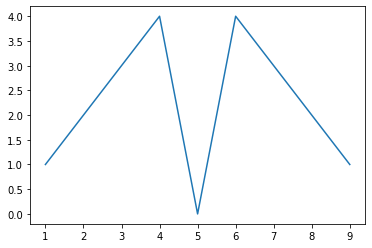

In [ ]:
x=range(1,10)
y=[1,2,3,4,0,4,3,2,1]

plt.plot(x,y)

# plotting a line chart from a pandas object

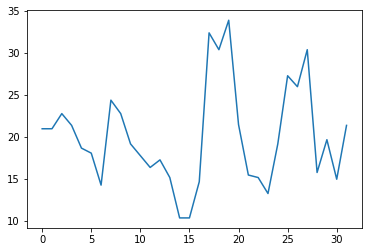

In [ ]:
cars['mpg'].plot()

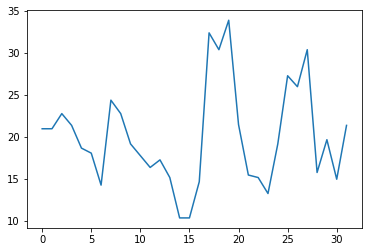

In [ ]:
#or 
mpg= cars['mpg']
mpg.plot()

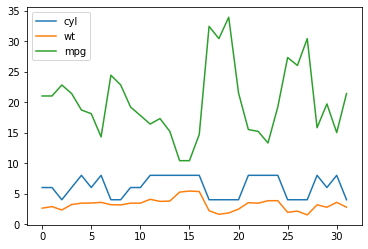

In [ ]:
df=cars[['cyl','wt','mpg']]
df.plot()

# * Creating a bar charts

# Creating a bar chart from list

<BarContainer object of 9 artists>

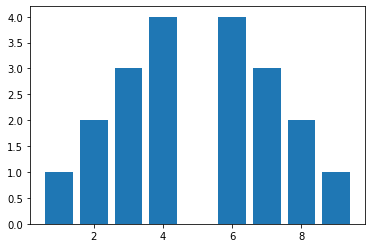

In [ ]:
plt.bar(x,y)

# Creating a bar chart from a pandas object

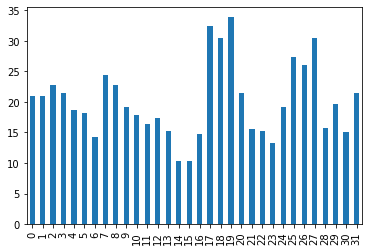

In [ ]:
mpg.plot(kind= 'bar')

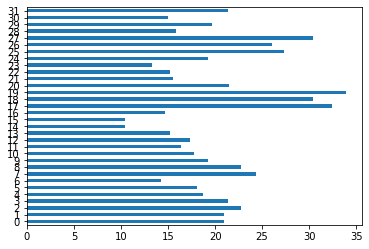

In [ ]:
mpg.plot(kind= 'barh')

# Creating a bar chart 

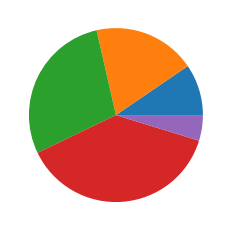

In [ ]:
x=[1,2,3,4,0.5]
plt.pie(x)
plt.show()

# Saving a plot

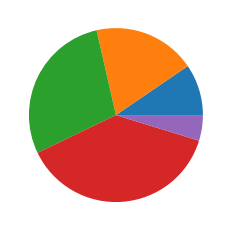

In [ ]:
plt.pie(x)
plt.savefig('pie chart.png')
plt.show()

# To know the place where the image is saved

In [ ]:
%pwd

'/content'

# Segment 2 : Defining plot elements

In [ ]:
# first we do import for all previous modules together with the following
from numpy.random import randn #في حالة عمل الجدول يدوي بارقام عشوائية

In [ ]:
%matplotlib inline  
#☝️to print the plot on jupyter notebook online
rcParams['figure.figsize']=5,4 # Plot dimensions

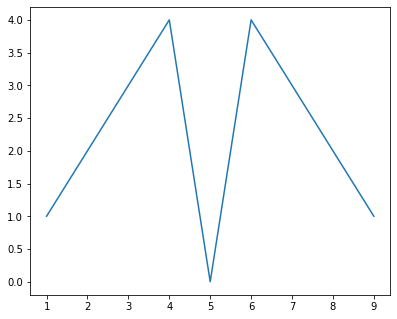

In [ ]:
x= range(1,10)
y= [1,2,3,4,0,4,3,2,1]

fig= plt.figure() #To print blank figure
ax= fig.add_axes([.1,1,1,1]) #To add figure axes

ax.plot(x,y) #To plot it out

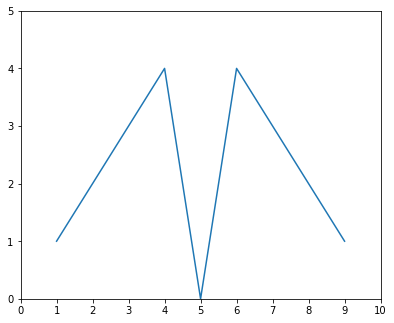

In [ ]:
#Setting limits and adding ticks marks to axes

fig= plt.figure() #To print blank figure
ax= fig.add_axes([.1,1,1,1]) #To add figure axes

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([0,1,2,3,4,5])

ax.plot(x,y)

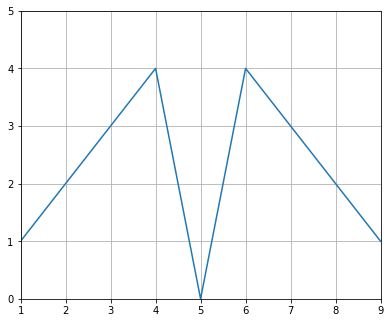

In [ ]:
# To print plot with grid
fig= plt.figure() #To print blank figure
ax= fig.add_axes([.1,1,1,1]) #To add figure axes

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

# Generating multiple plots in one figure with subplots

<Figure size 360x288 with 0 Axes>

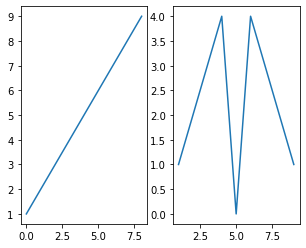

In [ ]:
fig= plt.figure()
fig, (ax1,ax2) = plt.subplots(1,2) #👈 الارقام دي تدل على عدد الاعمدة والصفوف واللي هانعملها(هنا صف واحد وعمودين )

ax1.plot(x)
ax2.plot(x,y)

# Defining plot color

<BarContainer object of 9 artists>

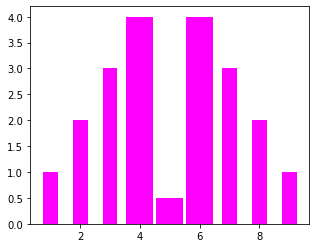

In [ ]:
x= range(1,10)
y= [1,2,3,4,.5,4,3,2,1]

wide = [.5,.5,.5,.9,.9,.9,.5,.5,.5]
color= ['fuchsia']

plt.bar(x,y, width= wide, color = color, align='center')

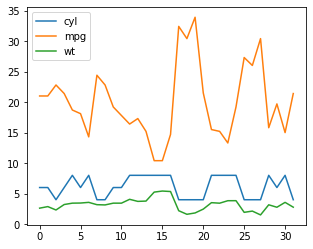

In [ ]:
df= cars[['cyl','mpg','wt']]
df.plot()

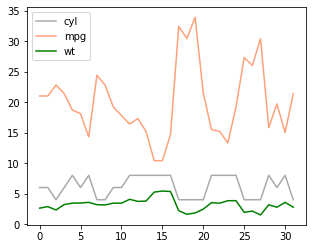

In [ ]:
color_theme=['darkgray','lightsalmon','green']
df.plot(color=color_theme)

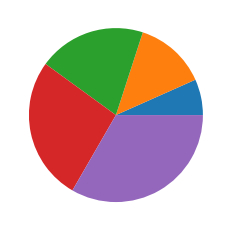

In [ ]:
z=[1,2,3,4,5]
plt.pie(z)
plt.show()

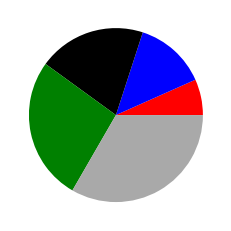

In [ ]:
colour_theme= ['red','blue','black','green','#A9A9A9']
plt.pie(z, colors=colour_theme)
plt.show()

# Customizing line style

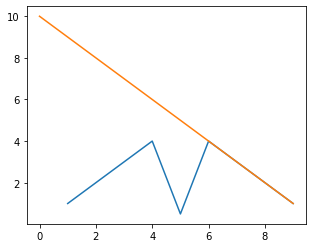

In [ ]:
x1= range(0,10)
y1= [10,9,8,7,6,5,4,3,2,1]

plt.plot(x,y)
plt.plot(x1,y1)

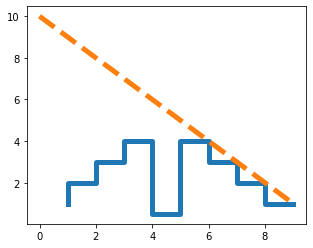

In [ ]:
plt.plot(x,y, ds='steps', lw=5)
plt.plot(x1,y1, ls='--', lw=5)

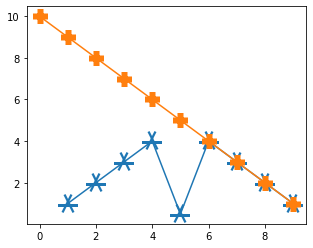

In [ ]:
plt.plot(x,y, marker = '1', mew= 20)
plt.plot(x1,y1, marker= '+', mew= 15)

# Segment 4 : Creating labels and annotations

# Labeling plot features 

# The functional method

Text(0, 0.5, 'I am your y-axis')

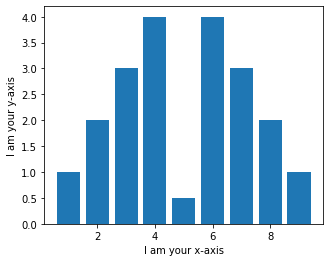

In [ ]:
x=range(1,10)
y=[1,2,3,4,.5,4,3,2,1]
plt.bar(x,y)

plt.xlabel('I am your x-axis')
plt.ylabel('I am your y-axis')


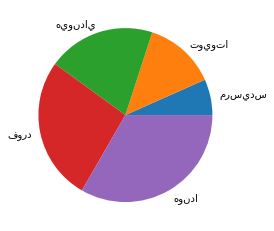

In [ ]:
z=[1,2,3,4,5]
veh_type=['مرسيدس','تويوتا','هيونداي','فورد','هوندا']
plt.pie(z, labels=veh_type)
plt.show()

# The object oriented method

Text(0, 0.5, 'miles/gallon')

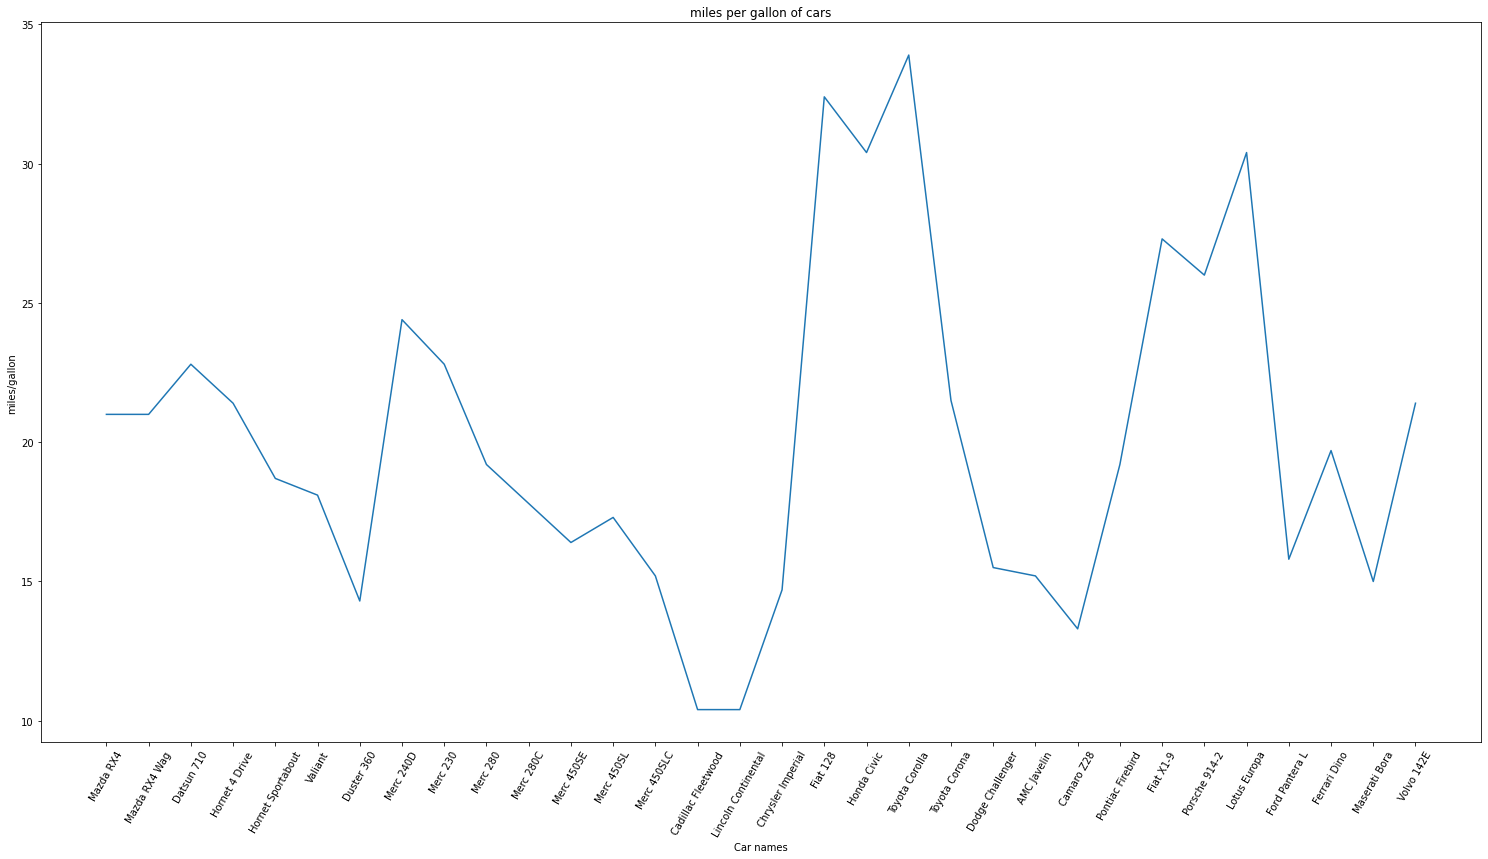

In [ ]:

fig= plt.figure(figsize=(20,10))
ax=fig.add_axes([.1,.1,1,1])
cars.mpg.plot() # you can use cars.mpg or cars['mpg'], also this command should be before the following commands so the data labels will be rotated to be visible.

ax.set_xticks(range(32))

ax.set_xticklabels(cars.Car_names, rotation=60, fontsize= 'medium')
ax.set_title('miles per gallon of cars')

ax.set_xlabel('Car names')
ax.set_ylabel('miles/gallon')


# Adding legend to your plot

# The functional method

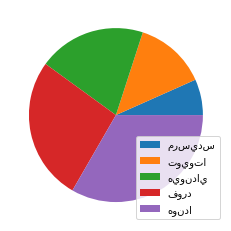

In [ ]:
plt.pie(z)
plt.legend(veh_type, loc='best')
plt.show()

# The object-oriented method

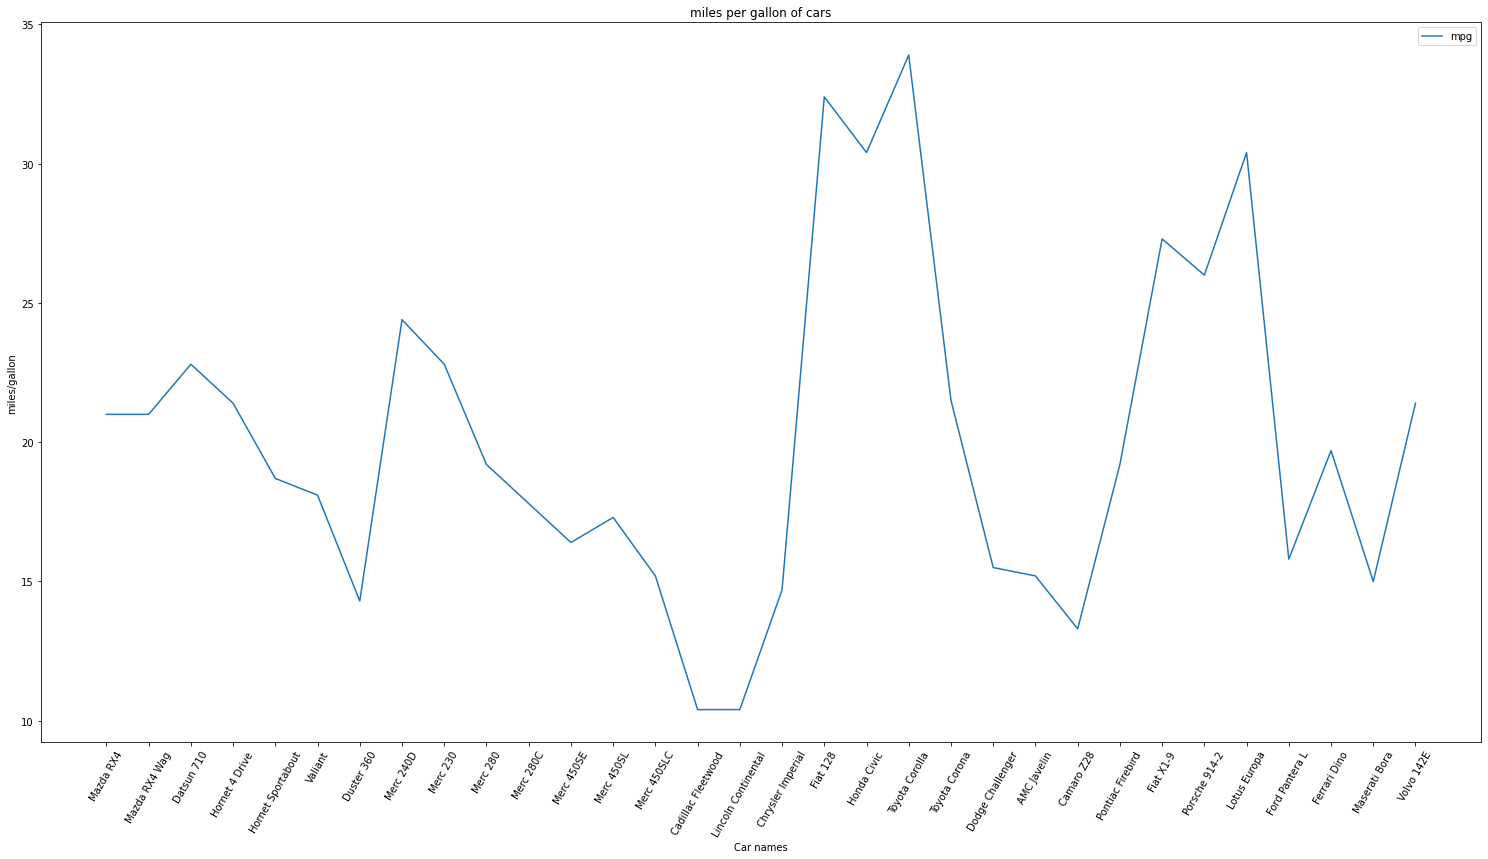

In [ ]:
fig= plt.figure(figsize=(20,10))
ax=fig.add_axes([.1,.1,1,1])
cars.mpg.plot() # you can use cars.mpg or cars['mpg'], also this command should be before the following commands so the data labels will be rotated to be visible.

ax.set_xticks(range(32))

ax.set_xticklabels(cars.Car_names, rotation=60, fontsize= 'medium')
ax.set_title('miles per gallon of cars')

ax.set_xlabel('Car names')
ax.set_ylabel('miles/gallon')

ax.legend(loc='best')

# Annotating your plot

In [ ]:
cars.mpg.max()

33.9

Text(21, 35, 'Toyota Corolla')

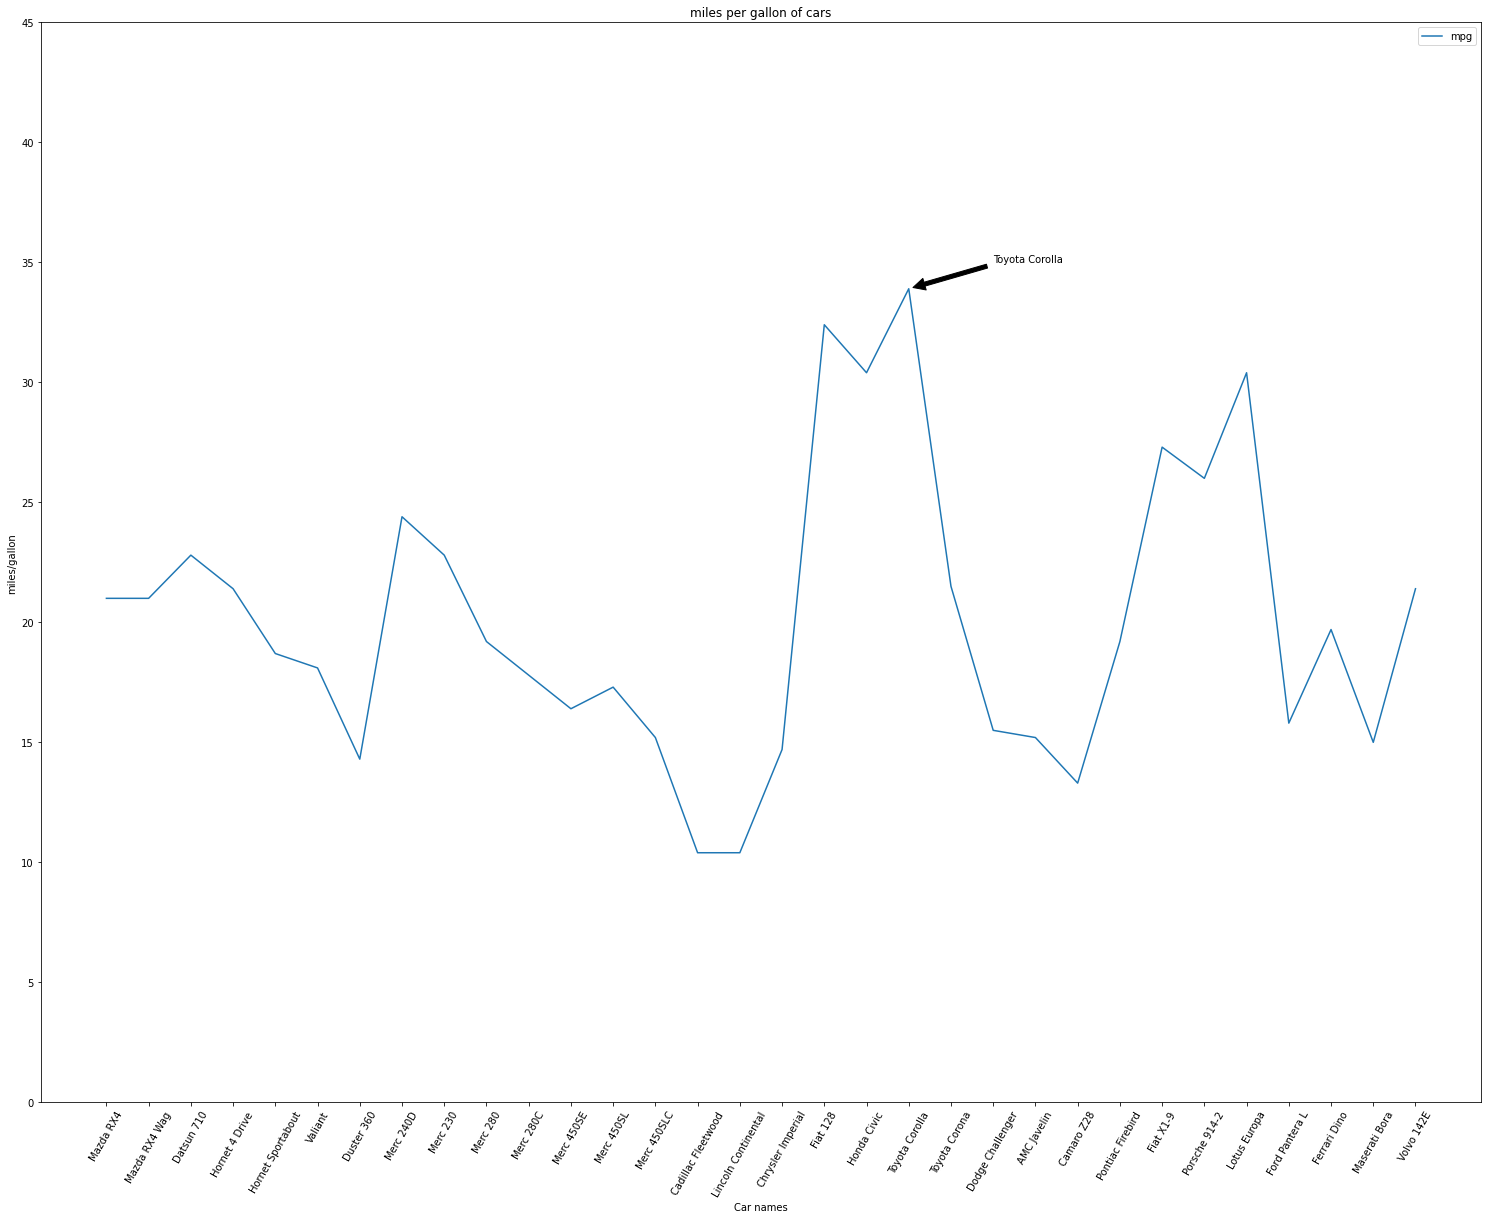

In [ ]:
fig= plt.figure(figsize=(20,15))
ax=fig.add_axes([.1,.1,1,1])
cars.mpg.plot() # you can use cars.mpg or cars['mpg'], also this command should be before the following commands so the data labels will be rotated to be visible.

ax.set_xticks(range(32))

ax.set_xticklabels(cars.Car_names, rotation=60, fontsize= 'medium')
ax.set_title('miles per gallon of cars')

ax.set_xlabel('Car names')
ax.set_ylabel('miles/gallon')

ax.legend(loc='best') # 👈 To add legend to the chart.

ax.set_ylim([0,45])
ax.annotate('Toyota Corolla', xy=(19,33.9),xytext=(21,35), arrowprops=dict(facecolor='black',shrink=0.05))

# Sigment 5 : Visualizing time series

# The simplest time series plot

In [ ]:
from numpy.random import randn
address='https://docs.google.com/spreadsheets/d/e/2PACX-1vSn4w16hn9_C81TjdoHdnnxNo4kGtNrqm_wti4K5_gd3hD00z4rFBrYWesJLzEBrX-8wMi_8p5tTj3q/pub?output=csv'
df=pd.read_csv(address, index_col='Order Date', parse_dates=True) # ترتيب الداتا ليكون التاريخ أول عمود
df.head(5)

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


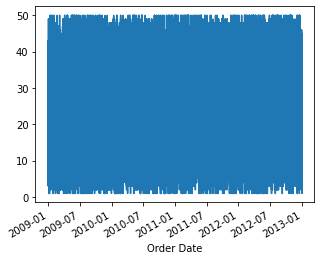

In [ ]:
df['Order Quantity'].plot()
# زي ما احنا شايفين الداتا غير واضحة لانها كتيرة ، فهناخد منها عينة عشوائية في الخطوة التالية

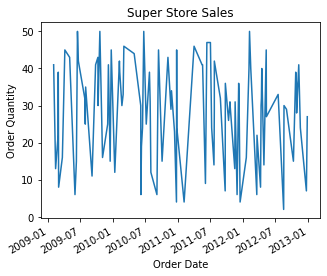

In [ ]:
df2= df.sample(n=100, random_state=25, axis=0)  #لأخذ عينة عشوائية من الداتا
plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Super Store Sales')

df2['Order Quantity'].plot()

# Segment 6 : Creating Statistical Data graphics

In [ ]:
import seaborn as sb
sb.set_style('whitegrid')

# Eyeballing dataset distribution with histogram

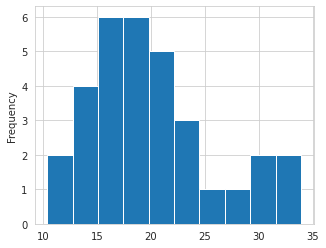

In [ ]:
# We will work on metCars data which previously imported
cars.index=cars.Car_names
mpg= cars['mpg']
mpg.plot(kind='hist')

# Another way to create histogram

[]

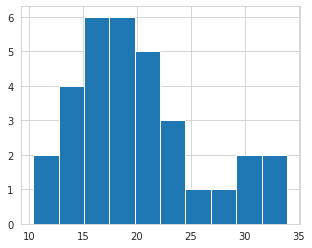

In [ ]:
plt.hist(mpg)
plt.plot()

# Creating histogram with seaborn library

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


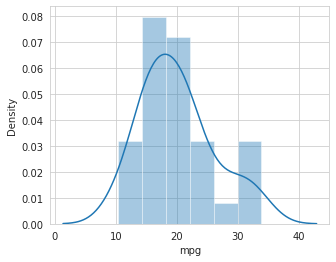

In [ ]:
sb.distplot(mpg)

# Seeing scatterplots in action

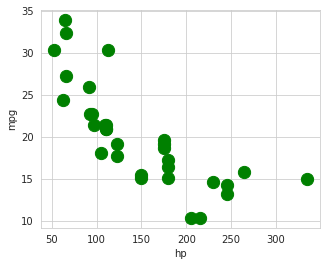

In [ ]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['green'], s=150)  #c=color, s=size

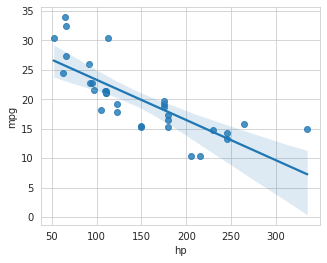

In [ ]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

# Generating a scatterplot matrix (using seaborn)

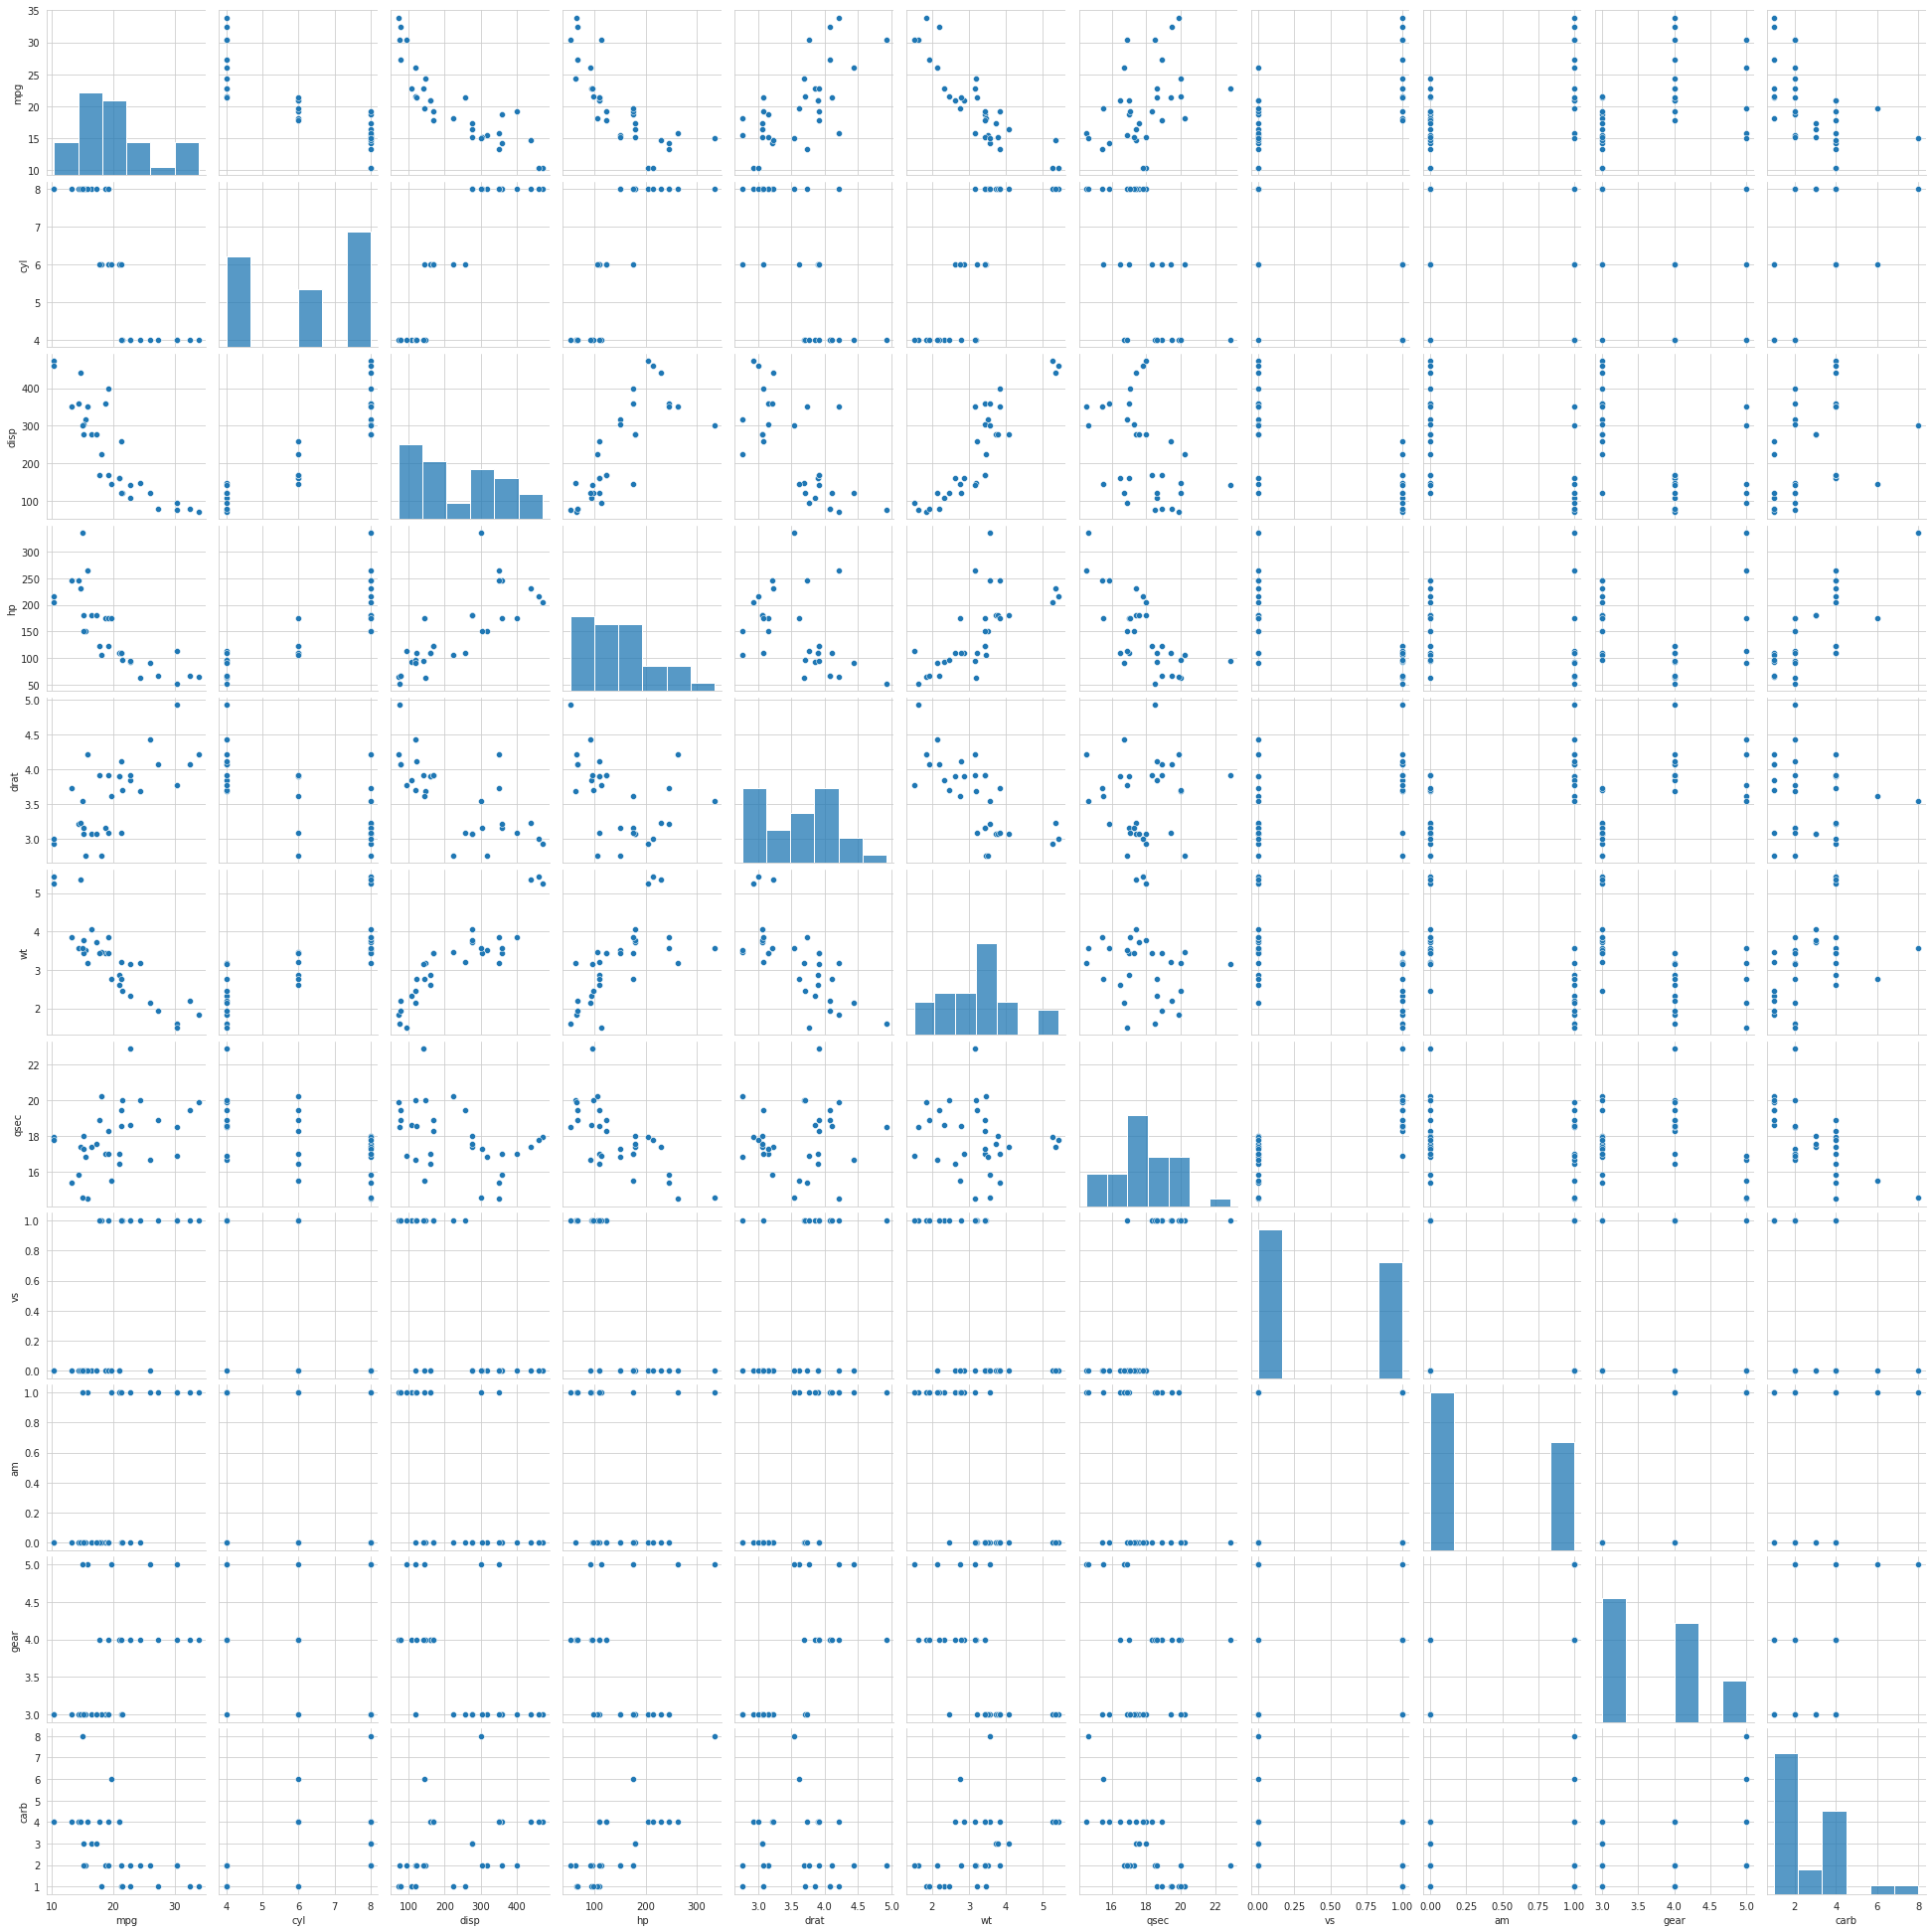

In [ ]:
sb.pairplot(cars)

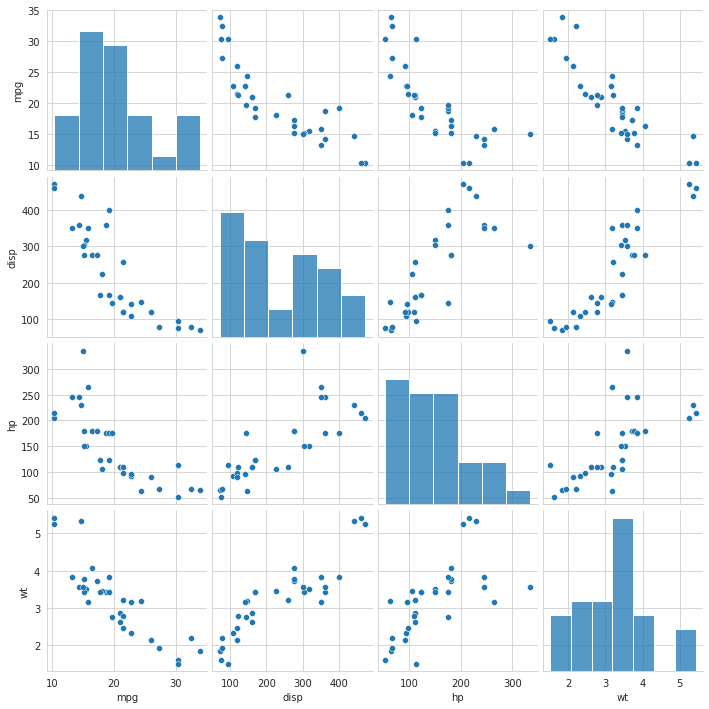

In [ ]:
#To better see the correlated columns
cars_subset=cars[['mpg','disp','hp','wt']]
sb.pairplot(cars_subset)

# Building boxplots

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


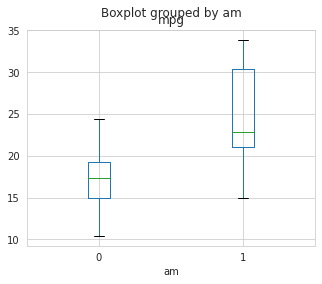

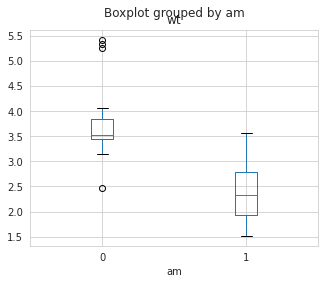

In [ ]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

# Boxplots using seaborn library

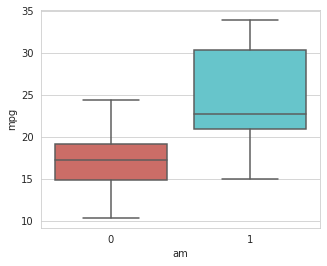

In [ ]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

# Chapter 5: Basic Math & Statistics

# Segment 1: Using Numpy to perform arithmetic operations on data 

In [ ]:
import numpy as np
from numpy.random import randn

In [ ]:
np.set_printoptions(precision=2) # 👈 To make only 2 decimal points.

# Creating arrays

# Creating arrays using a list

In [ ]:
a=np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [ ]:
#Creating a matrix
b= np.array([[10,20,30],[40,50,60]])
b

array([[10, 20, 30],
       [40, 50, 60]])

# Creating arrays via assignment

In [ ]:
# Generating random numbers using .randn method in numpy
np.random.seed(25)  # necessary, you put the same numbers on your machine
c= 36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [ ]:
d= np.arange(1,35) # you must write the start and the end number( this will print from the start to the number before the end number)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

# Performic arithemic on arrays

In [ ]:
a*10

array([10, 20, 30, 40, 50, 60])

In [ ]:
c+a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [ ]:
c-a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [ ]:
c*a

array([   8.22,   73.94,  -90.68,  -85.13, -172.24,  -48.02])

In [ ]:
c/a

array([  8.22,  18.48, -10.08,  -5.32,  -6.89,  -1.33])

# Segment 2: Multipying matrices and basic linear algebra

# Multiplying matrices & basic linear algebra

In [ ]:
aa= np.array([[2.,4.,6.],[1.,3.,5.],[10.,20.,30.]])
aa

array([[ 2.,  4.,  6.],
       [ 1.,  3.,  5.],
       [10., 20., 30.]])

In [ ]:
aa= np.array([[1.,2.,6.],[1.,3.,5.],[10.,20.,30.]])
aa

array([[ 1.,  2.,  6.],
       [ 1.,  3.,  5.],
       [10., 20., 30.]])

In [ ]:
bb=np.array([[0.,1.,2.],[3.,4.,5,],[6.,7.,8.]])
bb

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [ ]:
aa*bb # basic standard multiplication

array([[  0.,   2.,  12.],
       [  3.,  12.,  25.],
       [ 60., 140., 240.]])

In [ ]:
np.dot(aa,bb) # Matrix multiplication

array([[ 42.,  51.,  60.],
       [ 39.,  48.,  57.],
       [240., 300., 360.]])

**Segment 3: Generating summary statistics using pandas & scipy**

Looking at summary statistics that describes a variable numeric values

In [ ]:
cars.sum()

Car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [ ]:
cars.sum(axis=1) # to give some of rows

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [ ]:
cars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [ ]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [ ]:
cars.max()

Car_names    Volvo 142E
mpg                33.9
cyl                   8
disp                472
hp                  335
drat               4.93
wt                5.424
qsec               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [ ]:
#To know the of the row that contain the maximum value
mpg=cars.mpg
mpg.idxmax()

19

**Looking at summary statistics that describe variable distribution**

In [ ]:
cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [ ]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [ ]:
# value count of the unique values
gears=cars.gear
gears.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [ ]:
cars.describe() # get the descriptive statistics for the entire datast

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


**Segment 4: summarizing categorical data using pandas**

**The basic**

In [ ]:
cars.index= cars.Car_names
carb= cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [ ]:
cars_cat=cars[['cyl','vs','am','gear']]
cars_cat

,cyl,vs,am,gear
0,6,0,1,4
1,6,0,1,4
2,4,1,1,4
3,6,1,0,3
4,8,0,0,3
5,6,1,0,3
6,8,0,0,3
7,4,1,0,4
8,4,1,0,4
9,6,1,0,4


In [ ]:
gears_group= cars.groupby('gear')
gears_group.describe()

mpg                                   ... carb                    
     count       mean       std   min   25%  ...  min  25%  50%  75%  max
gear                                         ...                         
3     15.0  16.106667  3.371618  10.4  14.5  ...  1.0  2.0  3.0  4.0  4.0
4     12.0  24.533333  5.276764  17.8  21.0  ...  1.0  1.0  2.0  4.0  4.0
5      5.0  21.380000  6.658979  15.0  15.8  ...  2.0  2.0  4.0  6.0  8.0

[3 rows x 80 columns]

**Transforming variables to categorical data type**

In [ ]:
cars['group'] = pd.Series(cars.gear, dtype='category') #Creating a series of categorical data type  in a new column in the dataframe.

In [ ]:
cars['group'].dtype

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [ ]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

**Describing categorical data with crosstabs**

A cross tabulation table is extremely important, you need to know how to use it in order to make sense of categorical data. 

In [ ]:
pd.crosstab(cars['am'], cars['gear']) 

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


# Segment 5: Starting with parametric methods in pandas & Scipy

**The pearson correlation**

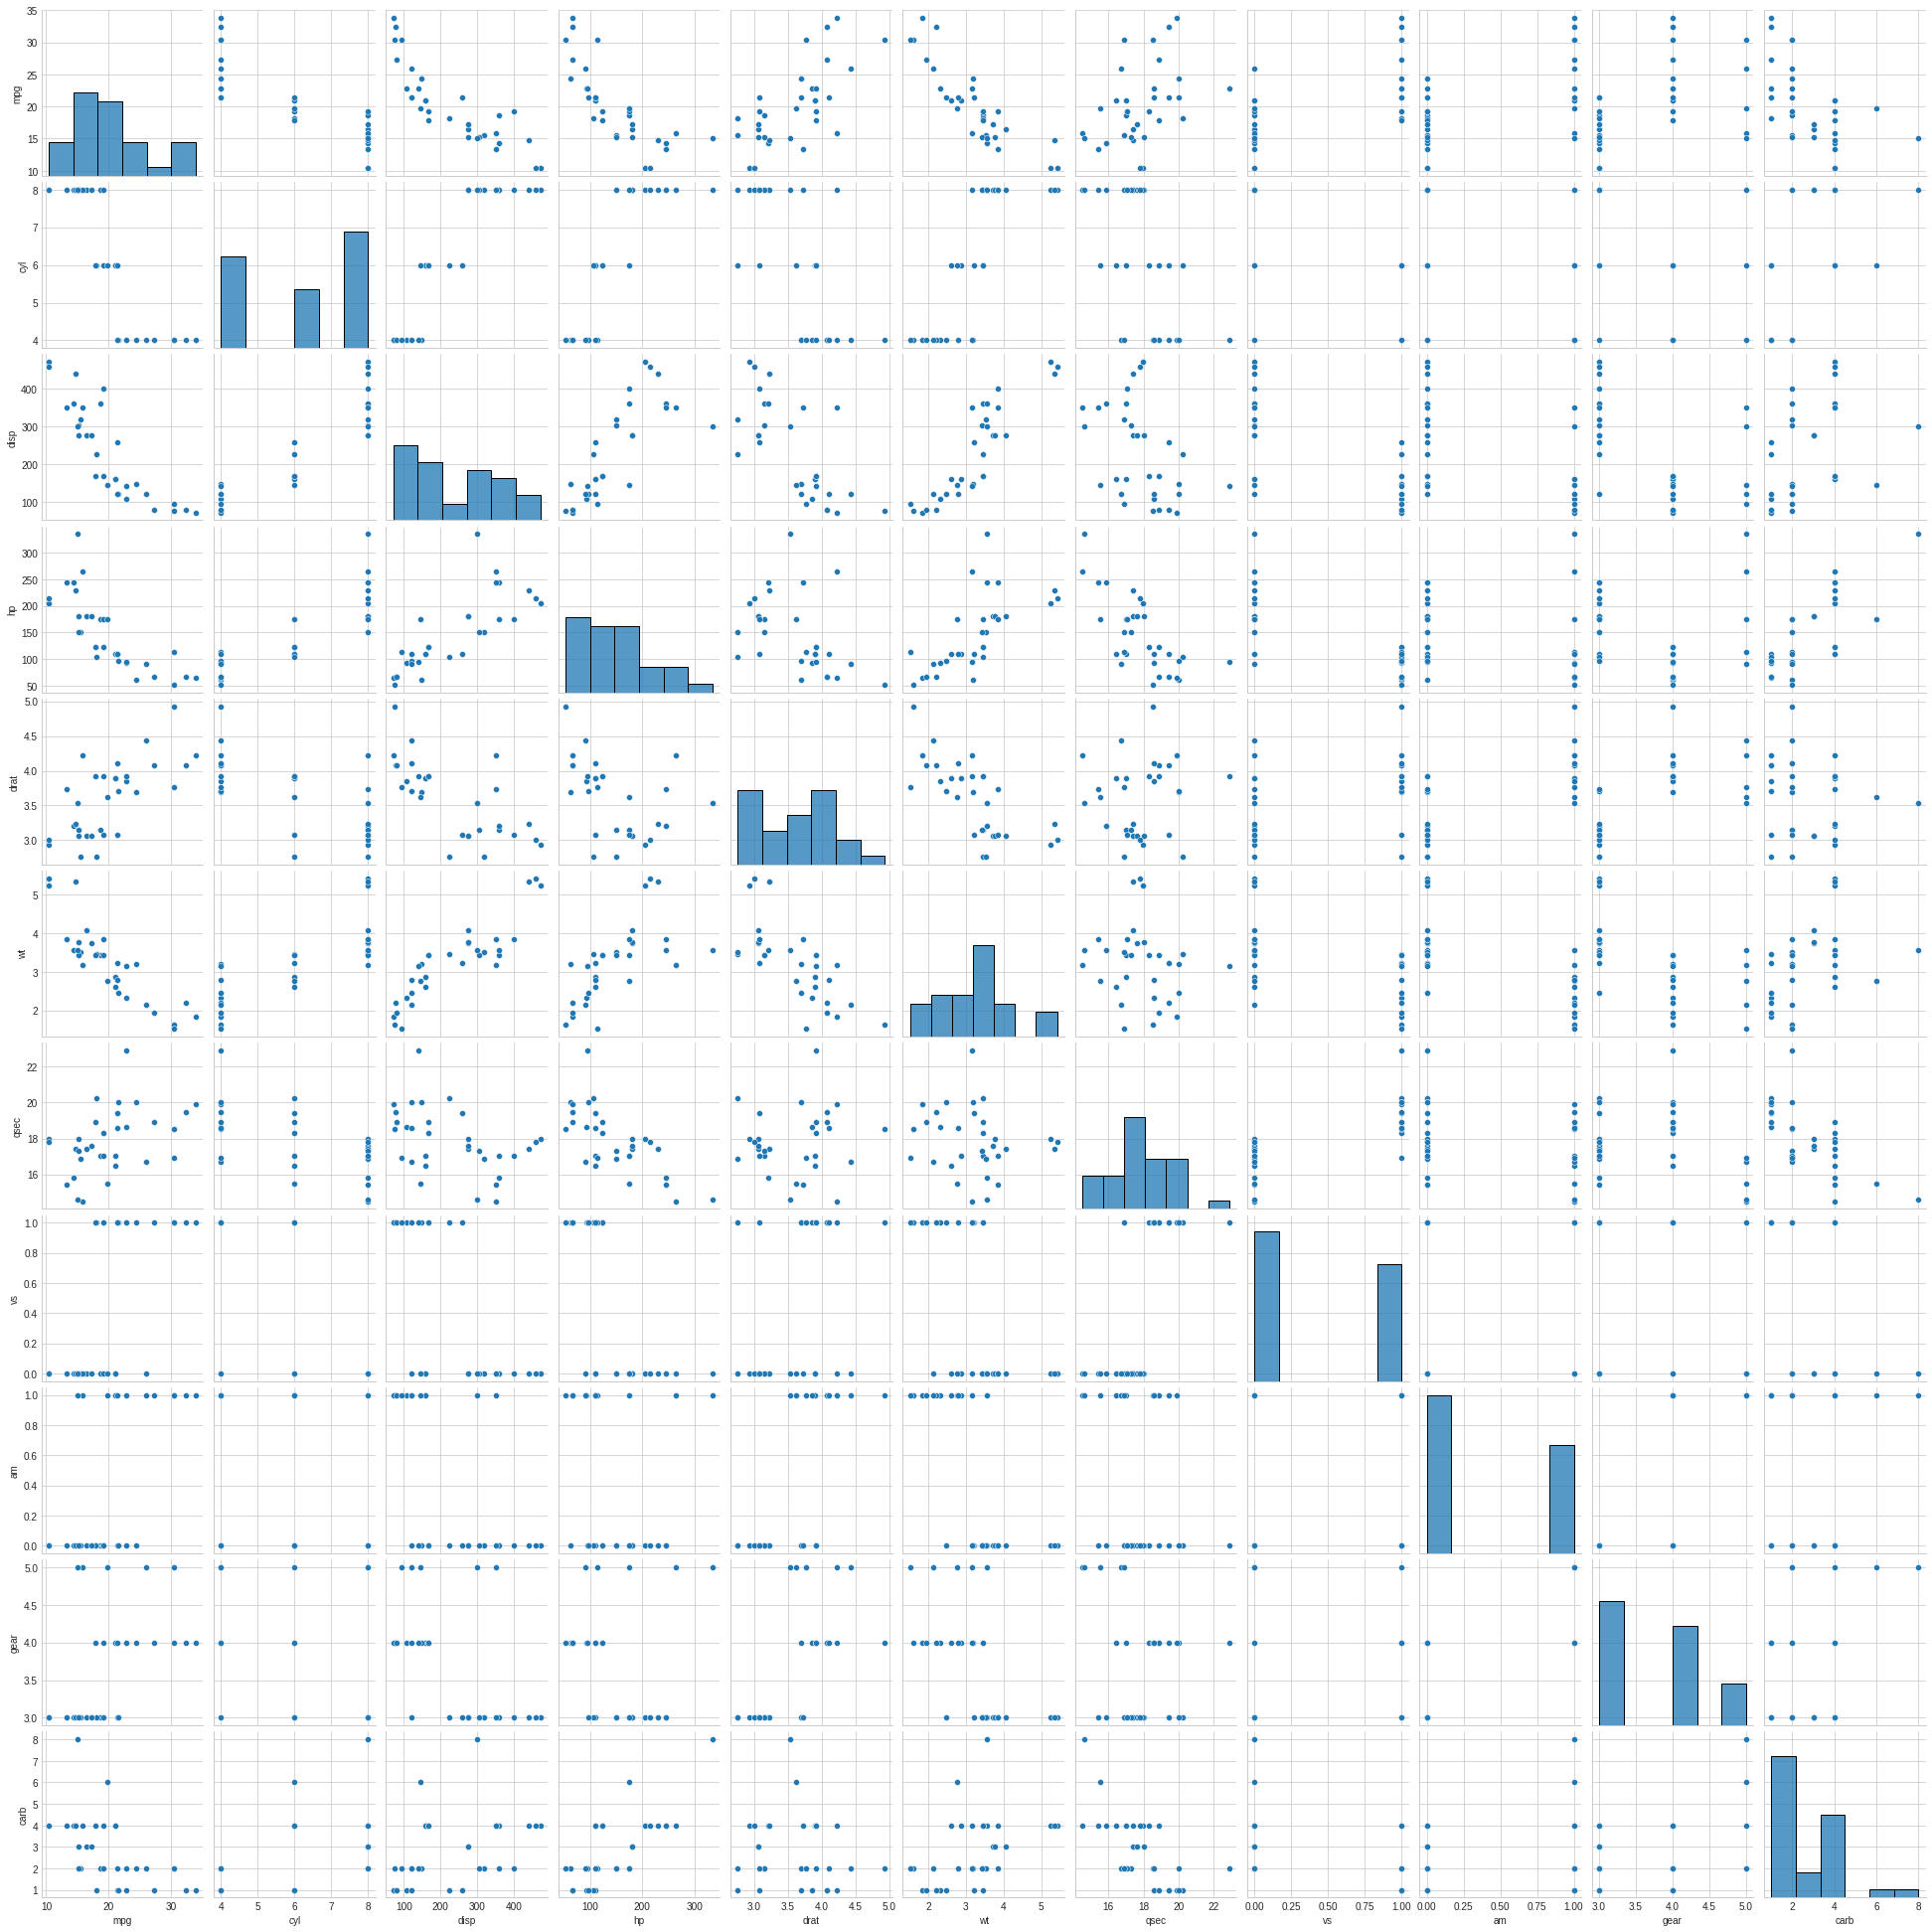

In [ ]:
sb.pairplot(cars)

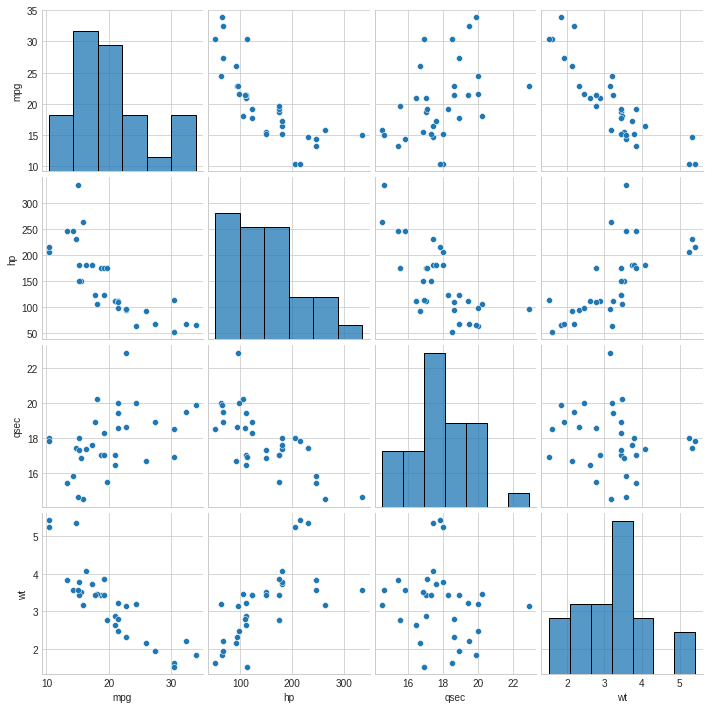

In [ ]:
x=cars[['mpg','hp','qsec','wt']]
sb.pairplot(x)

**Using scipy to calculate the pearson correlation coefficient**

In [ ]:
mpg=cars['mpg']
hp=cars['hp']
qsec=cars['qsec']
wt=cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient -0.776


In [ ]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient -0.868


In [ ]:
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient 0.419


**Using pandas to calculate the pearson coefficient**

In [ ]:
#To rapidly print the pearson coefficients for all the variable pairs in our smaller subset.
corr=x.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


**Using seaborn to visualize the Pearson Correlation Coefficient**

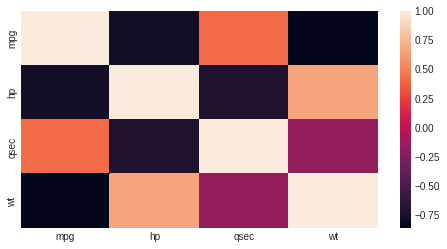

In [ ]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Segment 6: Delving into non-parametric methods using pandas & scipy

**The Spearman Rank Correlation**

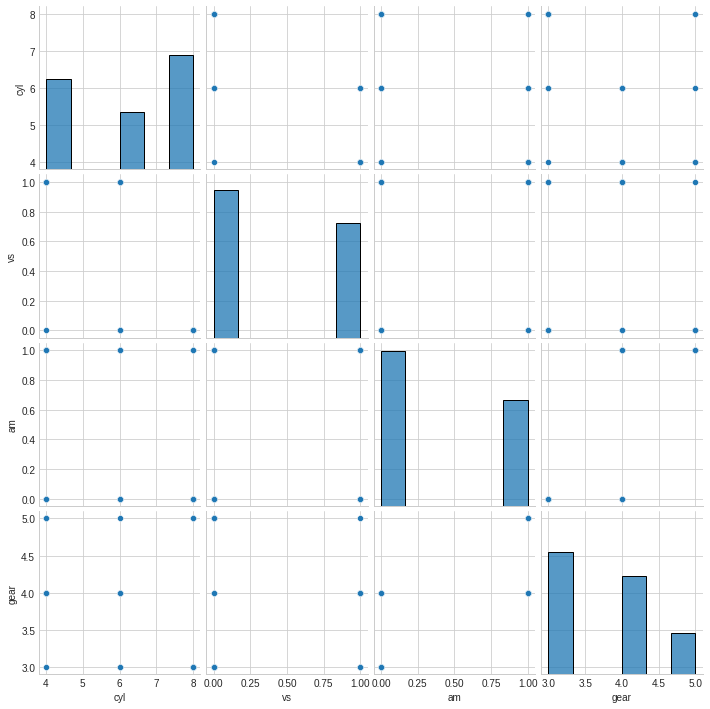

In [ ]:
X=cars[['cyl','vs','am','gear']]  #Only Categorical variables.
sb.pairplot(X)


In [ ]:
cyl= cars['cyl']
vs=cars['vs']
gear=cars['gear']
am=cars['am']

spearmanr_coefficient, p_value=spearmanr(cyl,vs)
print('Spearman Rank Correlation Coefficient%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient-0.814


In [ ]:
spearmanr_coefficient, p_value = spearmanr(gear, vs)
print('SpearmanR Correlation Coefficient %0.3f'%(spearmanr_coefficient))

SpearmanR Correlation Coefficient 0.283


In [ ]:
spearmanr_coefficient, p_value = spearmanr(am, vs)
print('SpearmanR Correlation Coefficient %0.3f'%(spearmanr_coefficient))

SpearmanR Correlation Coefficient 0.168


**Chi-square test for independance**

In [ ]:
table= pd.crosstab(cyl,am)

chi2, p, dof, expected=chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 8.741 p_value 0.013


In [ ]:
table= pd.crosstab(cyl,vs)

chi2, p, dof, expected=chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 21.340 p_value 0.000


In [ ]:
table= pd.crosstab(cyl,gear)

chi2, p, dof, expected=chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 18.036 p_value 0.001


**As we see all the p_values are not greater than 0.05, so, we must reject the null hypothesis  and conclude that those data are correlated.**

**Segment7: Normalizing & transforming features with MinMaxScaler() and fit_transform()**

In [1]:
mpg=cars.mpg
plt.plot(mpg)

NameError: ignored

In [ ]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


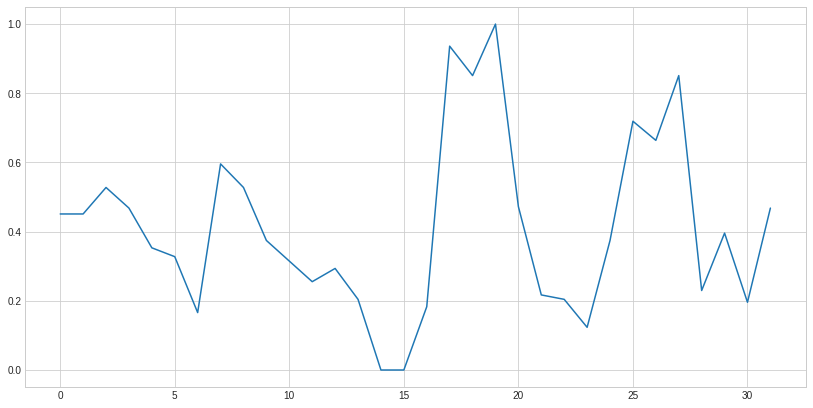

In [ ]:
mpg_matrix= mpg.values.reshape(-1,1)  # To shaping our data as a one-column matrix.

scaled=preprocessing.MinMaxScaler() # MinMaxScaler To transform our variable to a scaled range , by default this range from 0 to 1

scaled_mpg= scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

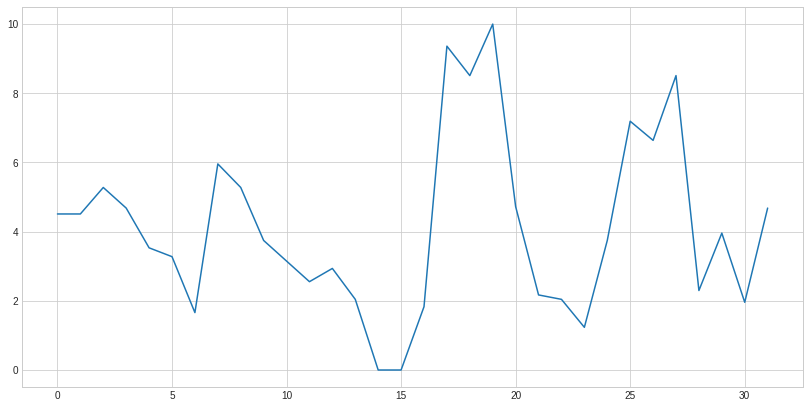

In [ ]:

scaled=preprocessing.MinMaxScaler(feature_range=(0,10)) # scale to a new feature range.

scaled_mpg= scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

***Using scale() to scale your features***

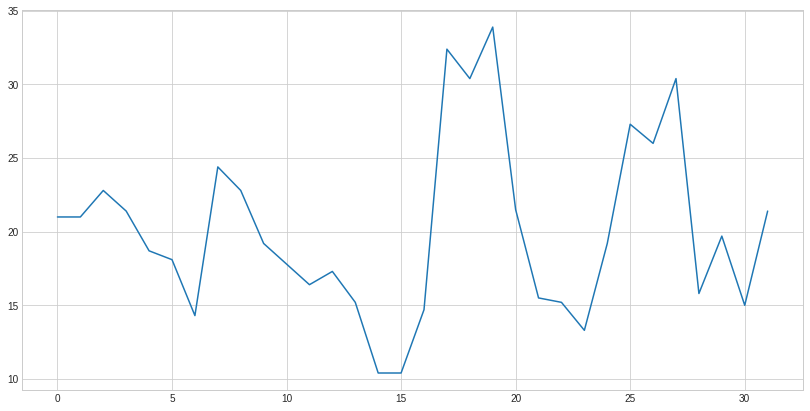

In [ ]:
standardized_mpg= scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)


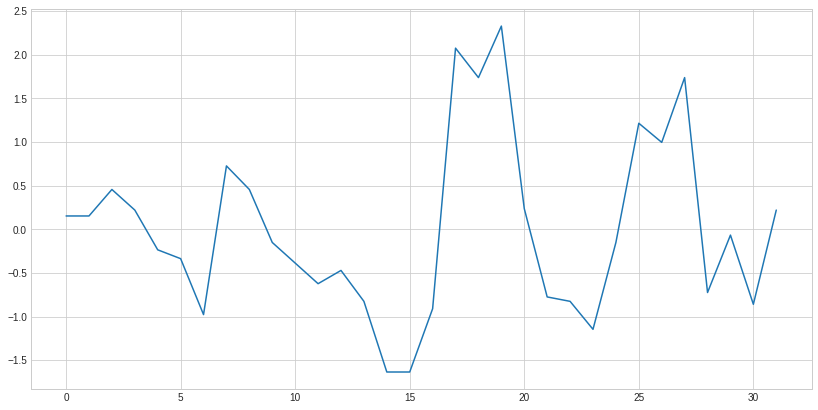

In [ ]:
standardized_mpg= scale(mpg) #without the previous arguments, mean=0 and the data distribution is normal distribution.
plt.plot(standardized_mpg)

# Segment 8: Outlier (extreme values) analysis using univariate method**

In [36]:
address= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQYCBCflIOyTC-tSWsBZhpEGVpoGM1QEp4bM3dITcIr3Kd3eecIFKIskC4hu5R56uQvDljvcfbtcXIa/pub?output=csv'

df= pd.read_csv(filepath_or_buffer=address, header=None, sep=',')
df.columns= ['Sepal length', 'Sepal width','Petal length','Petal width','species']
df.head(5)

,Sepal length,Sepal width,Petal length,Petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
x= df.iloc[:,0:4].values
y=df.iloc[:,4].values
df[:5]

,Sepal length,Sepal width,Petal length,Petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Identifying outliers from Tukey boxplots**

[]

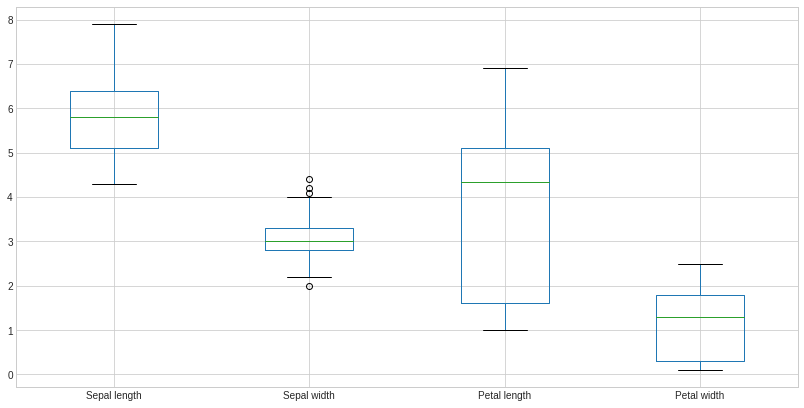

In [27]:
df.boxplot(return_type='dict')
plt.plot()

In [30]:
Sepal_Width= x[:,1]
iris_outliers=(Sepal_Width>4)
df[iris_outliers]

,Sepal length,Sepal width,Petal length,Petal width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [32]:
Sepal_Width=x[:,1]
iris_outliers=(Sepal_Width<2.05)
df[iris_outliers]

,Sepal length,Sepal width,Petal length,Petal width,species
60,5.0,2.0,3.5,1.0,versicolor


**Applying Tukey outlier labeling**

In [33]:
pd.options.display.float_format= '{:.1f}'.format
x_df= pd.DataFrame(x)
print(x_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


# **Segment 9: Multivariate analysis for outlier detection**

**Visually inspecting boxplots**

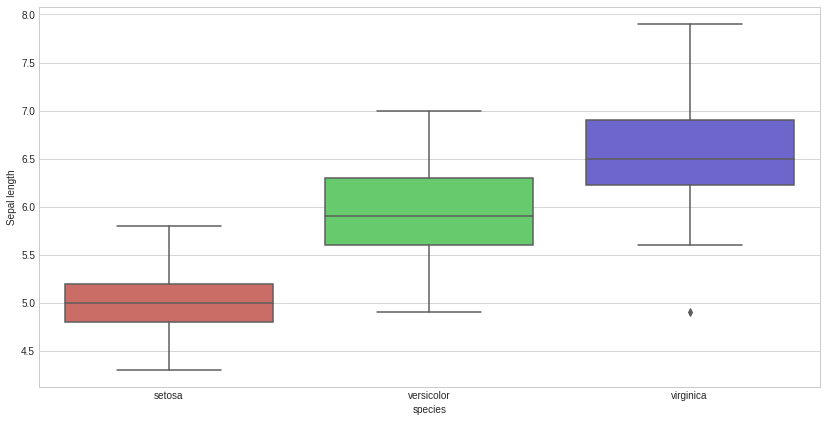

In [44]:
dat= df.iloc[:,0:4].values
target= df.iloc[:,4].values

df[:5]

sb.boxplot(x='species', y='Sepal length', data=df, palette='hls')

**Looking at the scatterplot matrix**

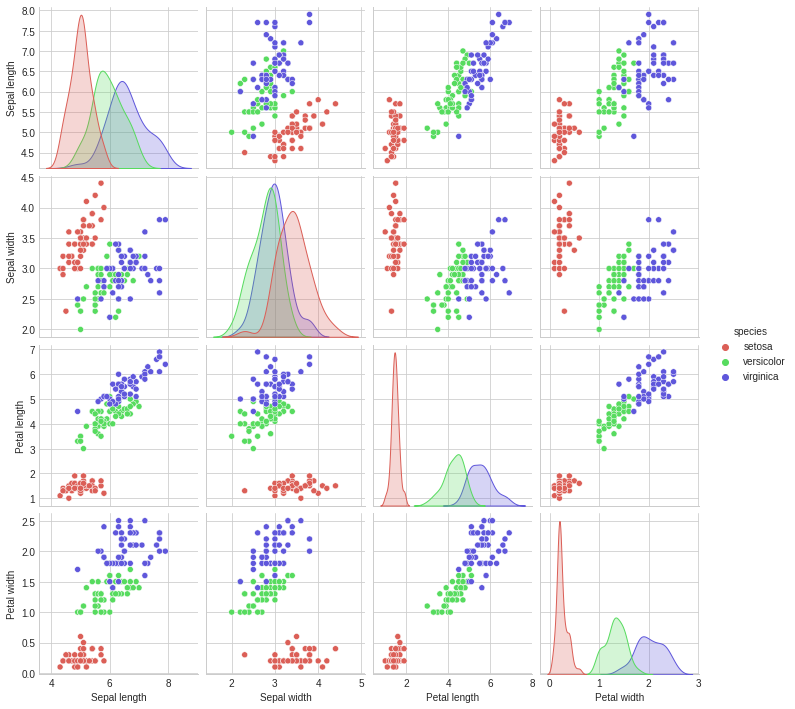

In [45]:
sb.pairplot(df, hue='species', palette='hls')